In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("water_potability.csv")

# Check for missing values
print(df.isnull().sum())


ph                 491
Hardness             0
TDS                  0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [2]:
# Fill missing values using median for each column
df_filled = df.fillna(df.median(numeric_only=True))

# Confirm no missing values remain
print(df_filled.isnull().sum())


ph                 0
Hardness           0
TDS                0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [3]:
import numpy as np

def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_cleaned = remove_outliers_iqr(df_filled)
print("Shape after outlier removal:", df_cleaned.shape)


Shape after outlier removal: (2666, 10)


In [4]:
from sklearn.preprocessing import StandardScaler

X = df_cleaned.drop("Potability", axis=1)
y = df_cleaned["Potability"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
# Display the first few rows of the cleaned dataset
print(df_cleaned.head())

# Display summary statistics of the cleaned dataset
print(df_cleaned.describe())


         ph    Hardness          TDS  Chloramines     Sulfate  Conductivity  \
0  7.036752  204.890456  20791.31898     7.300212  368.516441    564.308654   
2  8.099124  224.236259  19909.54173     9.275884  333.073546    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   
5  5.584087  188.313324  28748.68774     7.544869  326.678363    280.467916   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
                ph     Hardness           TDS  Chloramines      Sulfate  \
count  2666.000000  2666.000000   2666.000000  2666.000000  2666.000000   
mean      7.066

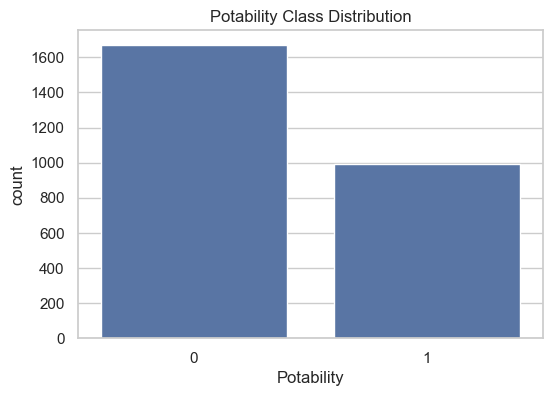

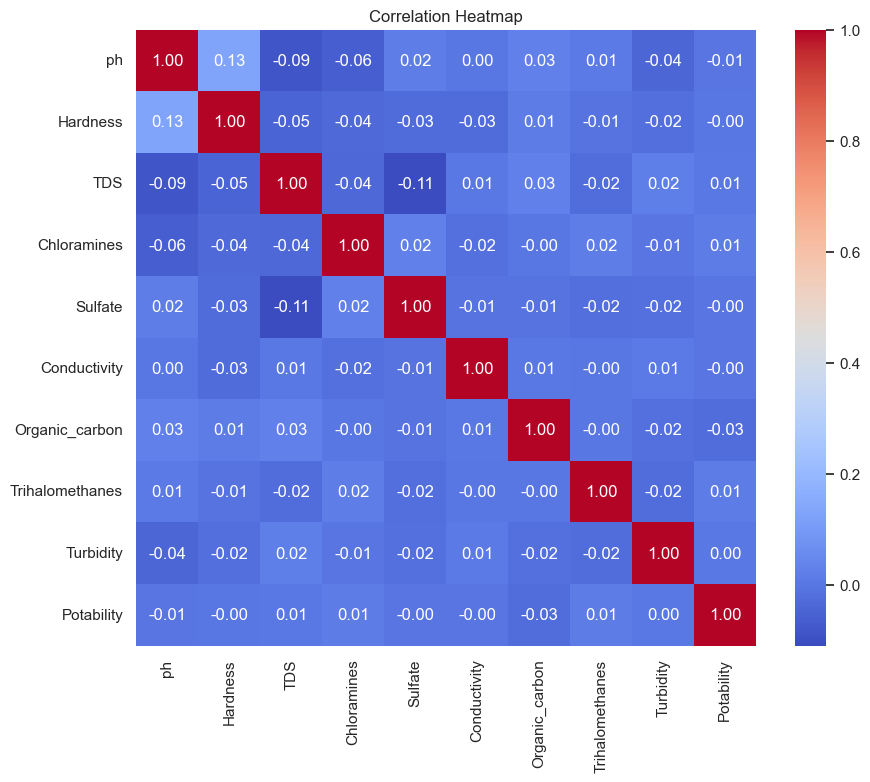

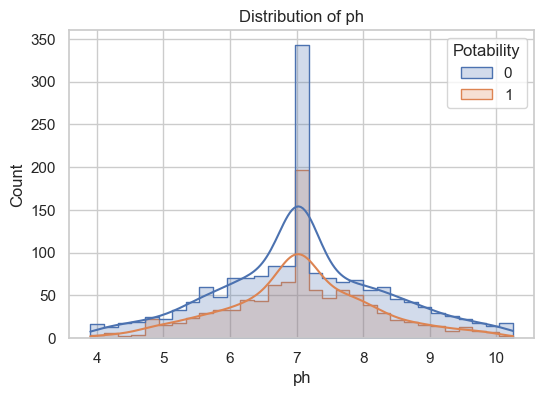

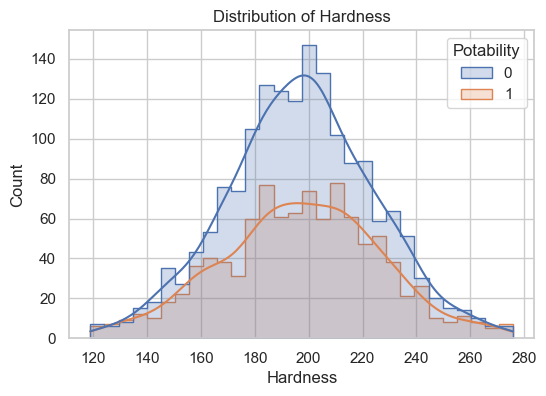

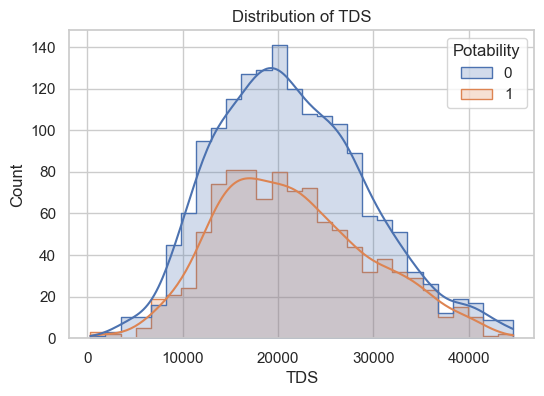

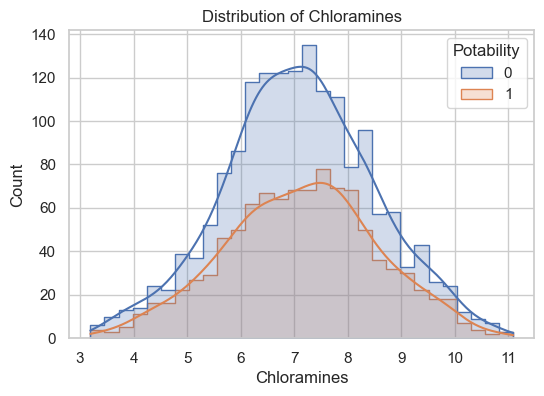

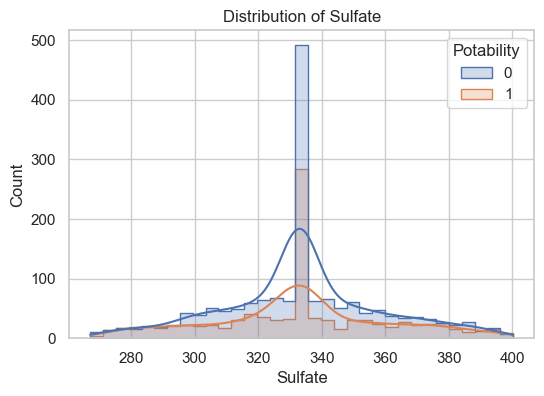

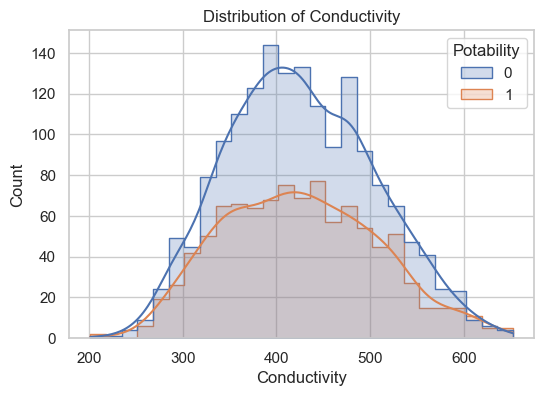

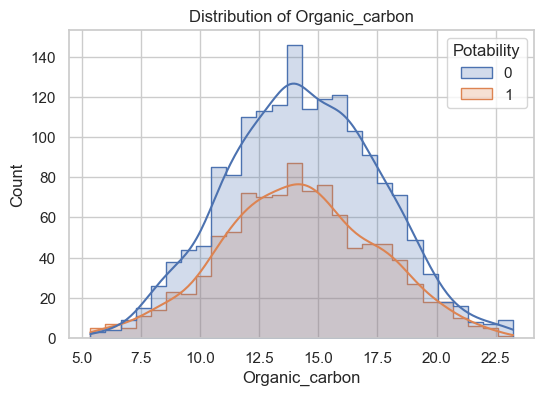

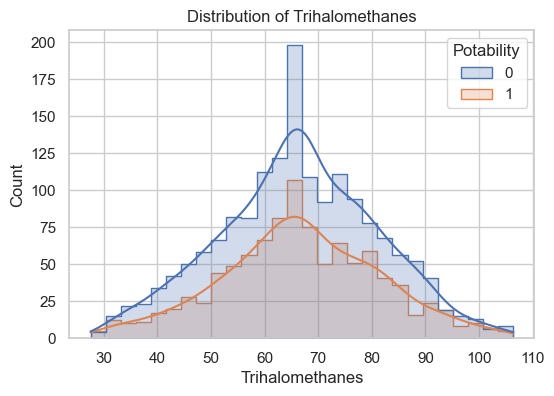

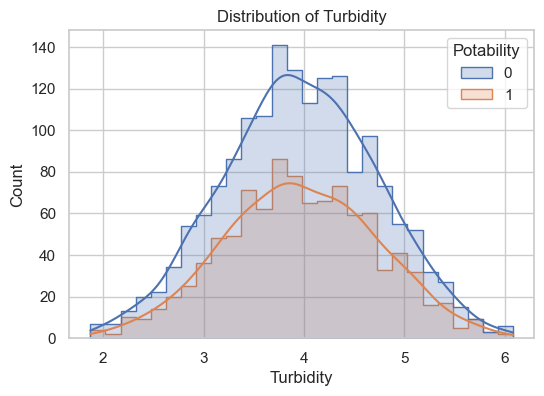

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for plots
sns.set(style="whitegrid")

# 1. Check class balance
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df_cleaned)
plt.title("Potability Class Distribution")
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df_cleaned.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# 3. Distribution plots for each feature
features = df_cleaned.columns[:-1]  # Exclude 'Potability'
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_cleaned, x=feature, hue="Potability", kde=True, element="step")
    plt.title(f"Distribution of {feature}")
    plt.show()


In [9]:
df_cleaned.to_csv("final_cleaned_dataset.csv", index=False)
